In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# load dataset
f1Stats=pd.read_csv(r'..\Dataset\F1Stats.csv');
#convert the fastest lap time to seconds 
def convert_to_seconds(time_str):
    try:
        if pd.isna(time_str):
            return None
        parts = time_str.strip().split(':')
        if len(parts) == 2:
            minutes = int(parts[0])
            seconds = float(parts[1])
            return minutes * 60 + seconds
        elif len(parts) == 1:
            return float(parts[0])  # Already in seconds
    except:
        return None

f1Stats['fastest_lap_time_sec'] = f1Stats['fastest_lap_time_sec'].apply(convert_to_seconds)

# get all the numerical columns
numerical = ['grid_position', 'final_position', 'fastest_lap_time_sec','avg_speed','pitstop_time_sec','total_laps',]
#ensure all numerical values are numeric
for col in numerical:
    f1Stats[col] = f1Stats[col].astype(str).str.strip()              # Remove whitespace
    f1Stats[col] = pd.to_numeric(f1Stats[col], errors='coerce')      # Convert to float with NaNs



# Exploratory Data Analysis


In [4]:
# basic info 
print("Columns:", f1Stats.columns) # displays the column names
print("Information:") 
print(f1Stats.info()) #displays dataset information         
print("Summary Statistics (Numerical):")
print(f1Stats.describe().T)# displays stats for numeric columns
print("Missing Values:", f1Stats.isnull().sum().sum()) #displays the total empty values

Columns: Index(['year', 'race', 'country', 'circuit', 'driver', 'team', 'grid_position',
       'final_position', 'fastest_lap_time_sec', 'avg_speed',
       'pitstop_time_sec', 'total_laps'],
      dtype='object')
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  759 non-null    int64  
 1   race                  759 non-null    object 
 2   country               759 non-null    object 
 3   circuit               759 non-null    object 
 4   driver                759 non-null    object 
 5   team                  759 non-null    object 
 6   grid_position         756 non-null    float64
 7   final_position        657 non-null    float64
 8   fastest_lap_time_sec  732 non-null    float64
 9   avg_speed             731 non-null    float64
 10  pitstop_time_sec      701 non-null    float64
 11 

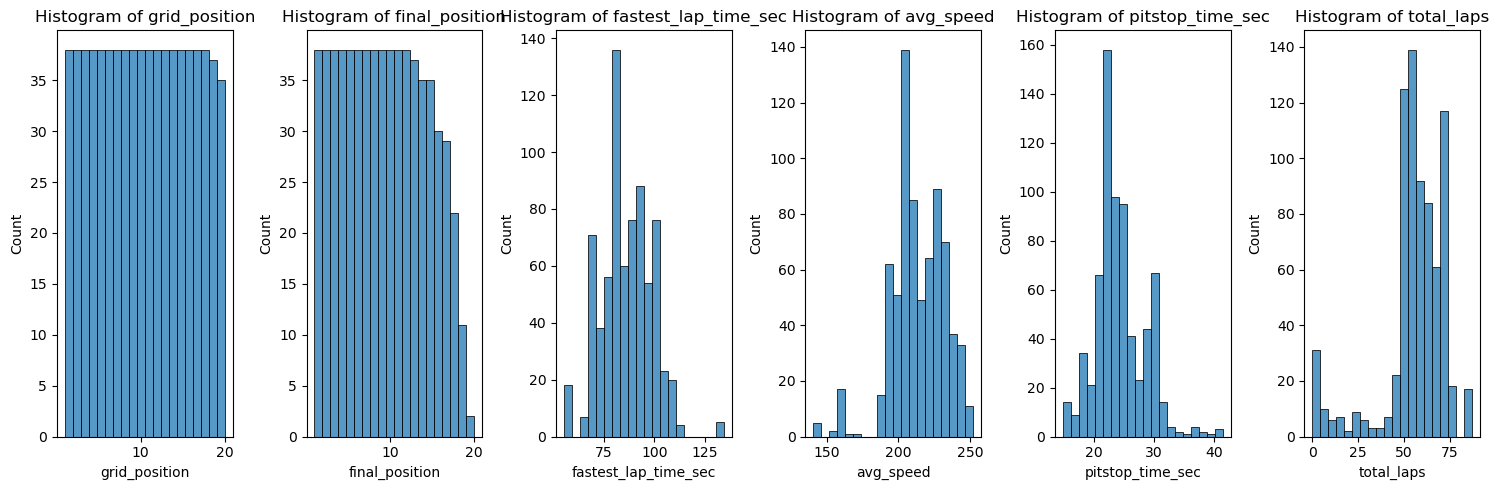

In [5]:
#numerical
n_cols = 6
n_rows_num = (len(numerical) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows_num, n_cols, figsize=(15, 5 * n_rows_num))
axes = axes.flatten()

# histograms for numerical features
for idx, feature in enumerate(numerical):
    sns.histplot(f1Stats[feature], bins=20, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
# removes empty subplots
for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
# plt.savefig('numerical_histograms.png', dpi=300, bbox_inches='tight') # saves pic used for report
plt.show()
plt.close()

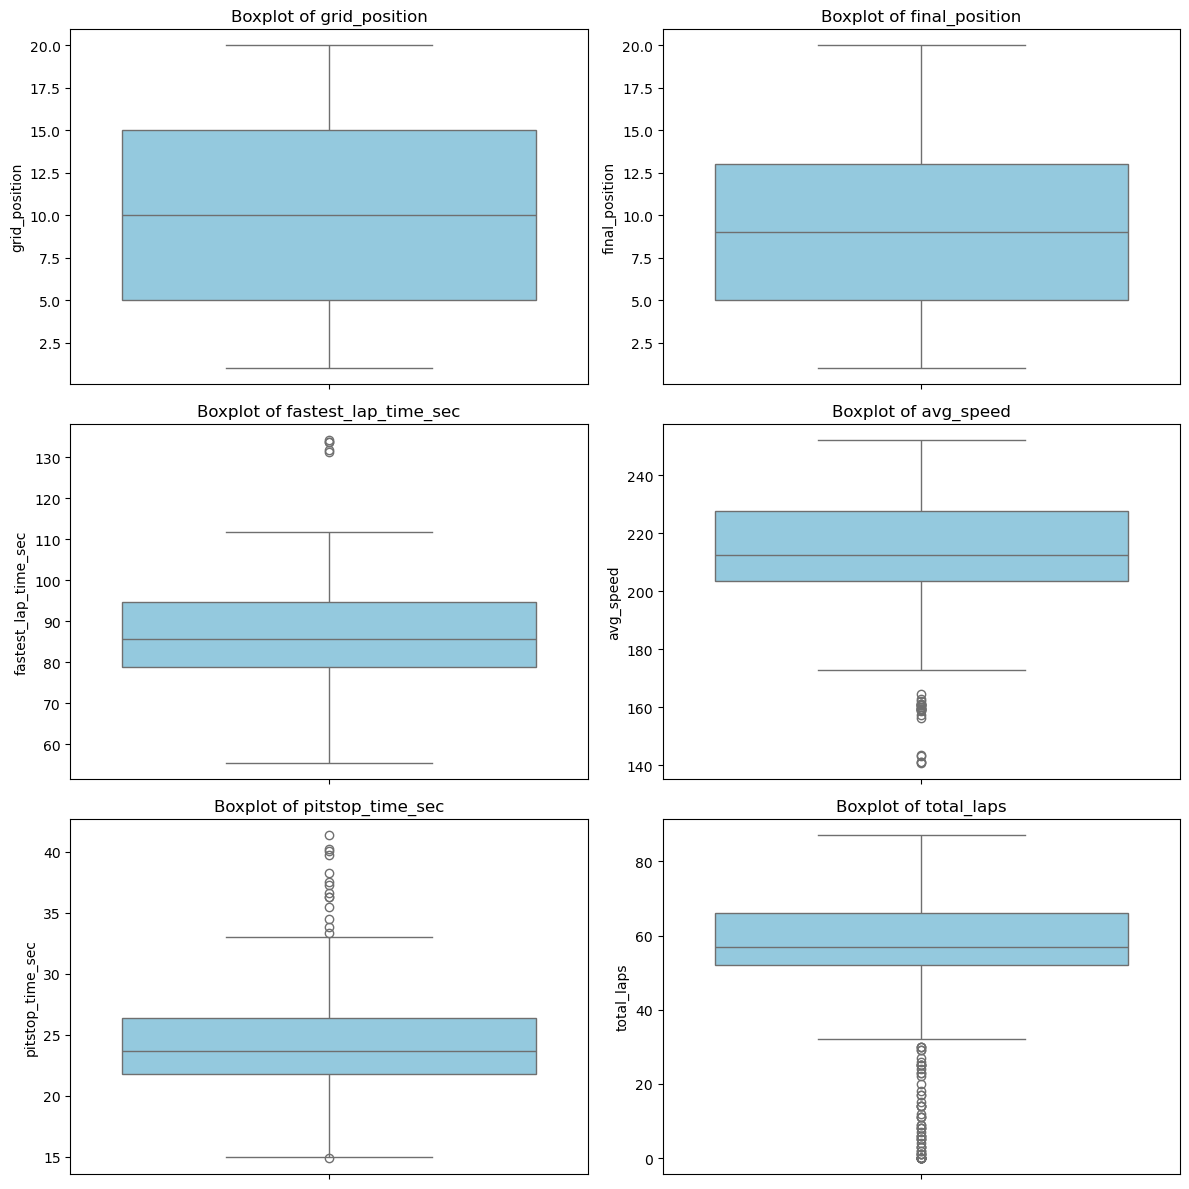

In [6]:
n = len(numerical)
cols = 2
rows = math.ceil(n / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()
# boxplots for numerical features
for idx, feature in enumerate(numerical):
    sns.boxplot(y=f1Stats[feature], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(feature)

# Remove unused subplots
for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
# plt.savefig('numerical_histograms.png', dpi=300, bbox_inches='tight') # saves pic used for report
plt.show()
plt.close()

<Axes: >

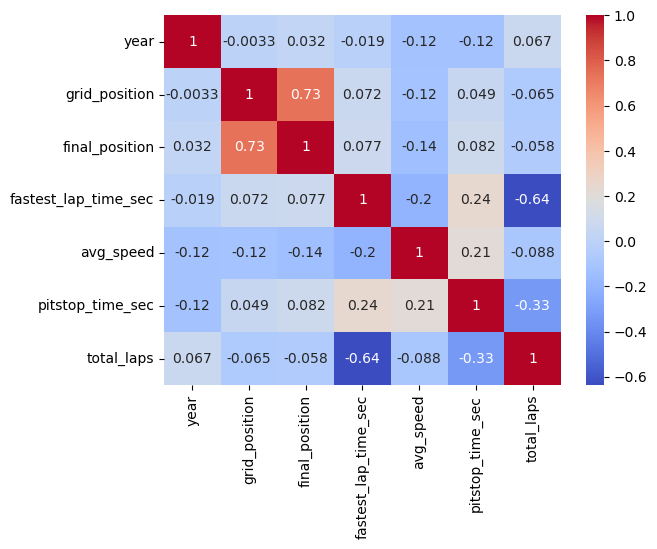

In [7]:
#correlation heatmaps
corr = f1Stats.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

Focus on drivers and their fastest laps

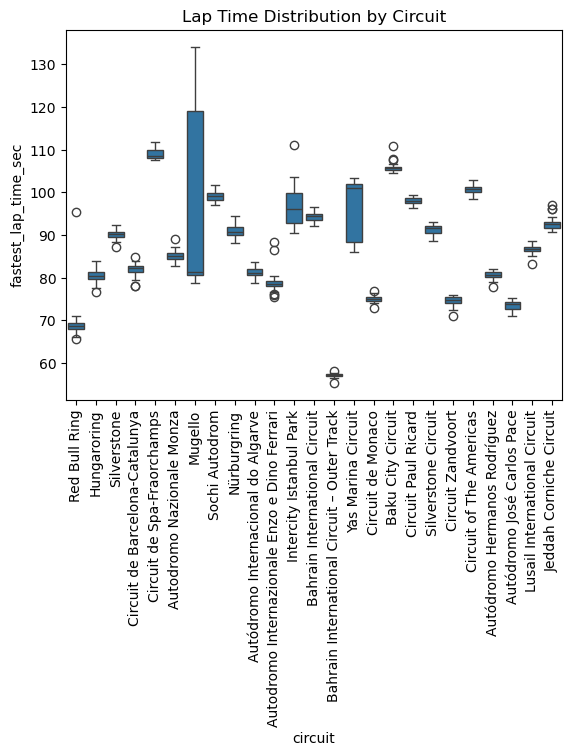

In [8]:
sns.boxplot(x='circuit', y='fastest_lap_time_sec', data=f1Stats)
plt.xticks(rotation=90)
plt.title('Lap Time Distribution by Circuit')
plt.show()

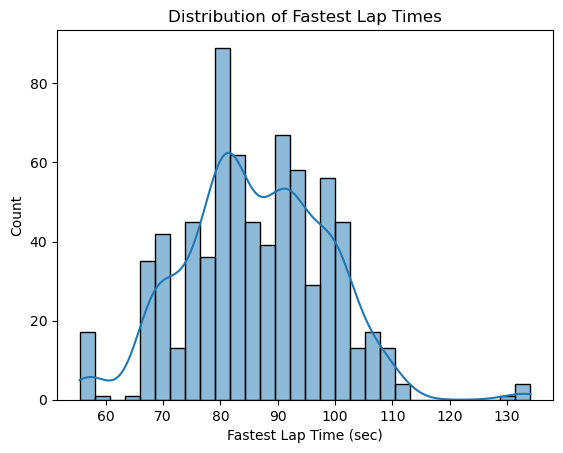

In [9]:
sns.histplot(f1Stats['fastest_lap_time_sec'], bins=30, kde=True)
plt.title('Distribution of Fastest Lap Times')
plt.xlabel('Fastest Lap Time (sec)')
plt.show()

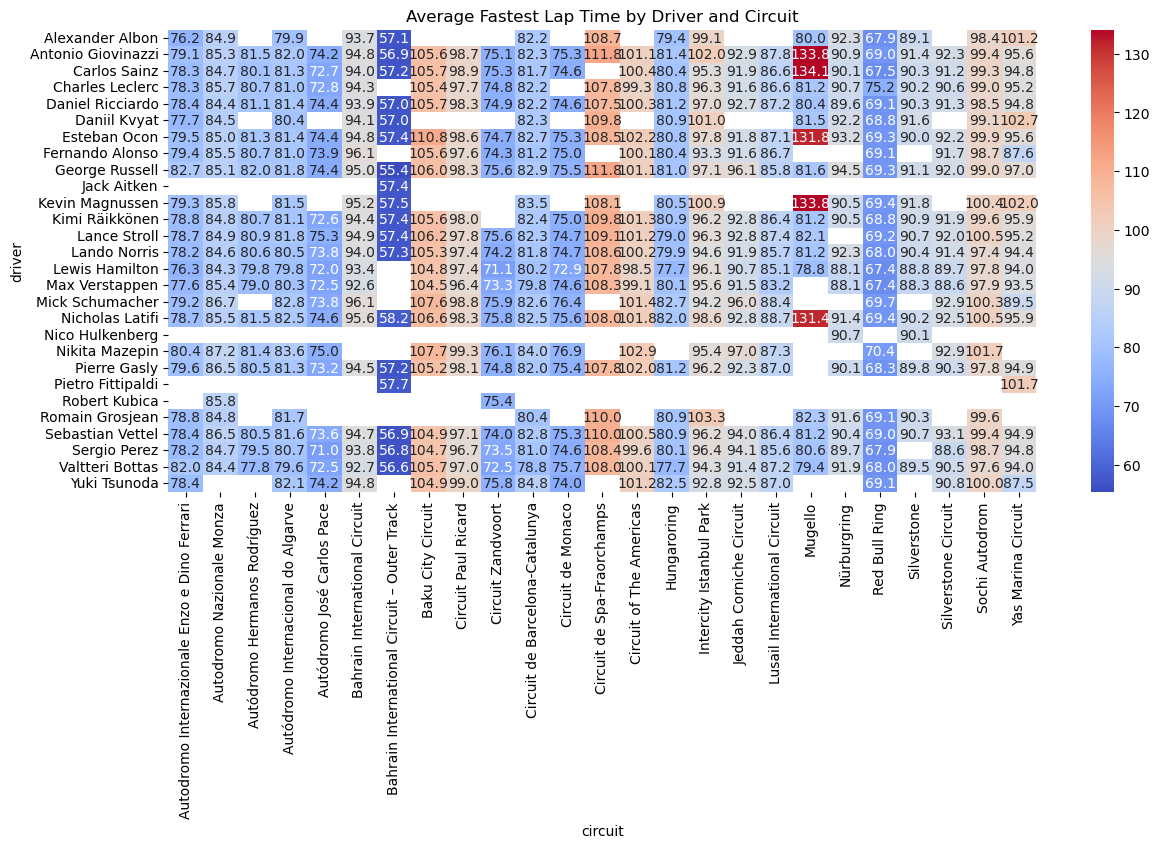

In [18]:

pivot = f1Stats.pivot_table(index='driver', columns='circuit', values='fastest_lap_time_sec', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Fastest Lap Time by Driver and Circuit')
plt.show()

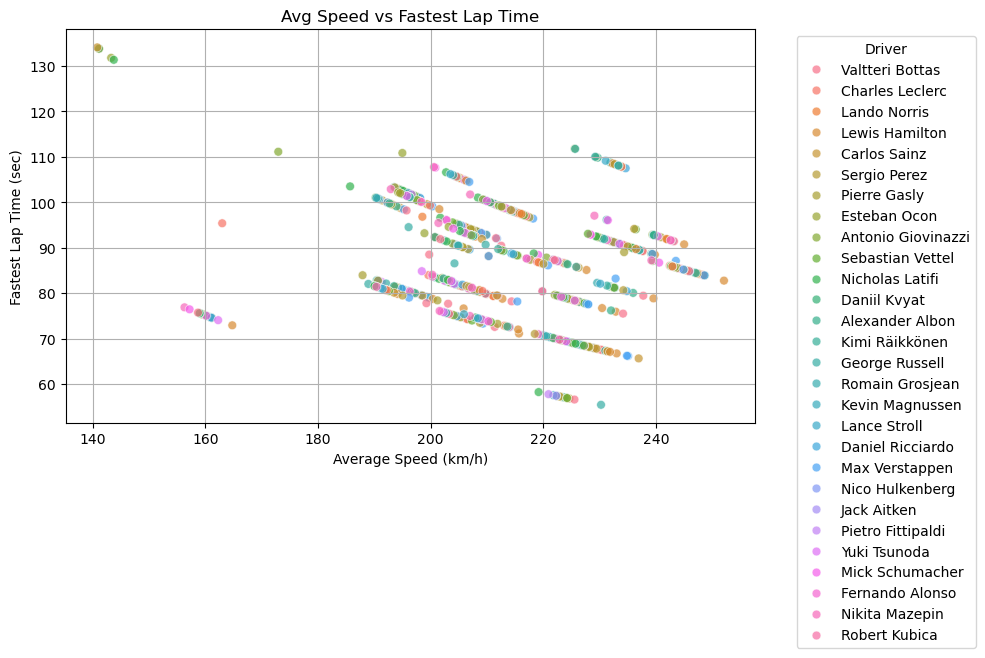

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=f1Stats, x='avg_speed', y='fastest_lap_time_sec', hue='driver', s=40, alpha=0.7, legend='brief')
plt.title('Avg Speed vs Fastest Lap Time')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Fastest Lap Time (sec)')
plt.grid(True)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

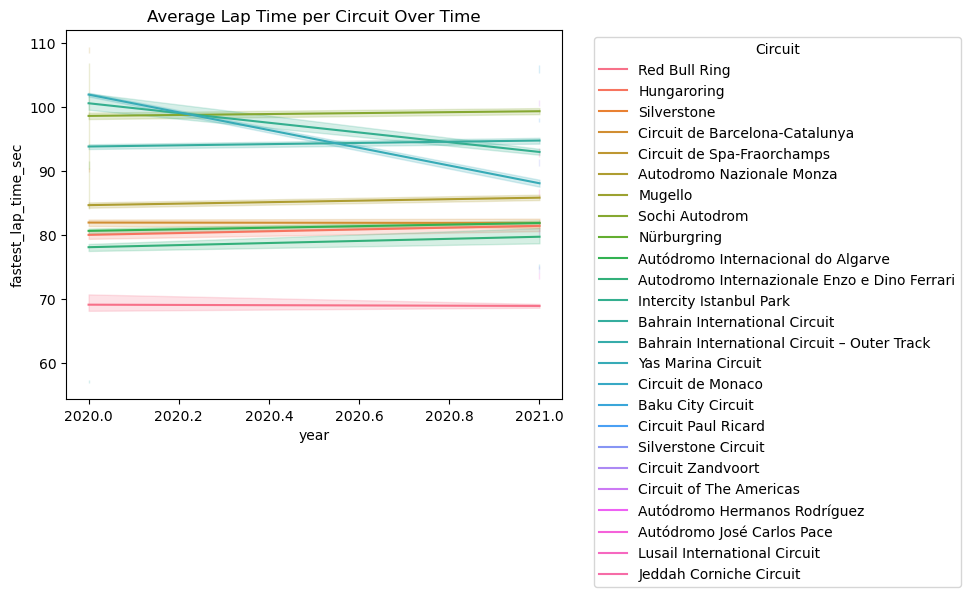

In [22]:
sns.lineplot(data=f1Stats, x='year', y='fastest_lap_time_sec', hue='circuit', estimator='mean')
plt.title('Average Lap Time per Circuit Over Time')
plt.legend(title='Circuit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Focus on teams and fastest pitstops

Focus on winner driver wins

# Feature Engineering

# Modeling